In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
import io
%cd "/Users/rajeshprabhakarkaila/Desktop/Datasets"

/Users/rajeshprabhakarkaila/Desktop/Datasets


In [130]:
imdbdf=pd.read_csv("IMDB Dataset.csv")

In [131]:
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [132]:
pd.set_option("display.max_colwidth",None)
imdbdf.review.head(2)

0    One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to th

In [133]:
imdbdf.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [134]:
# Lowercase Conversion
imdbdf.review=imdbdf.review.str.lower()

In [135]:
import re
def clean_txt(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [136]:
# Using clean_txt() function for removing punctuations, special characters, etc.
imdbdf.review=[str(clean_txt(x)) for x in imdbdf.review]

In [137]:
imdbdf.review=imdbdf.review.str.replace(r'\bbr\b','',regex=True)

In [138]:
from nltk.corpus import stopwords

In [139]:
english_stopwords=set(stopwords.words("english"))

In [140]:
from nltk.tokenize import word_tokenize

In [141]:
imdb_words=word_tokenize(str(imdbdf.review)) # Break content into words

In [142]:
imdb_words=[w for w in imdb_words if not w in english_stopwords]# removing stopwords

In [143]:
imdb_words=[w for w in imdb_words if len(w)>2]

In [144]:
from wordcloud import WordCloud

In [145]:
wordcloud=WordCloud(width=1000,height=500,collocations=False).generate(str(imdb_words))

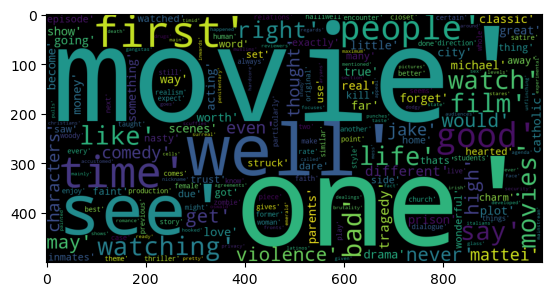

In [146]:
plt.imshow(wordcloud)
plt.show()

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [169]:
tfidf=TfidfVectorizer(max_features=500,stop_words="english",ngram_range=(2,2))

In [171]:
X_tfidf=tfidf.fit_transform(imdbdf.review)

In [175]:
pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_).head(2)

,far away,worth watching,spend time,serial killer,young woman,time movie,soap opera,make film,like real,real life,...,highly recommended,poorly written,horror flick,did great,worth time,movie making,half movie,fast paced,blah blah,pay attention
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
from sklearn.preprocessing import LabelEncoder

In [179]:
y=LabelEncoder().fit_transform(imdbdf.sentiment)

In [181]:
# Split Data into train and test
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test=train_test_split(X_tfidf,y,test_size=0.30,random_state=42)

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,RocCurveDisplay

In [189]:
logisticmodel=LogisticRegression().fit(X_train,y_train)

In [191]:
logisticmodel.score(X_train,y_train) # Accuracy on Train Data

0.7181714285714286

In [193]:
# predict on test data
logistic_test_pred=logisticmodel.predict(X_test)

In [195]:
accuracy_score(y_test,logistic_test_pred) # Accuracy on test data

0.7119333333333333

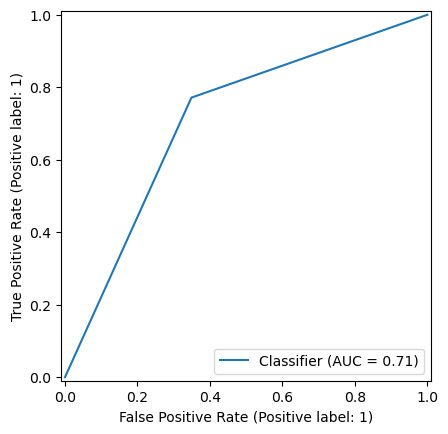

In [197]:
RocCurveDisplay.from_predictions(y_test,logistic_test_pred)

In [199]:
from sklearn.tree import DecisionTreeClassifier

In [253]:
treemodel=DecisionTreeClassifier(max_depth=60).fit(X_train,y_train)

In [254]:
treemodel.score(X_train,y_train)

0.7258285714285714

In [257]:
tree_test_pred=treemodel.predict(X_test)

In [259]:
accuracy_score(y_test,tree_test_pred)

0.6493333333333333

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
RFmodel=RandomForestClassifier(n_estimators=1000).fit(X_train,y_train)

In [265]:
RFmodel.score(X_train,y_train)

0.9149428571428572

In [267]:
RF_test_pred=RFmodel.predict(X_test)

In [269]:
accuracy_score(y_test,RF_test_pred)

0.6958

In [271]:
from sklearn.ensemble import GradientBoostingClassifier

In [281]:
GBMmodel=GradientBoostingClassifier(n_estimators=3000).fit(X_train,y_train)

In [282]:
GBMmodel.score(X_train,y_train)

0.8187428571428571

In [283]:
GBM_test_pred=GBMmodel.predict(X_test)

In [284]:
accuracy_score(y_test,GBM_test_pred)

0.7072666666666667

In [289]:
from sklearn.naive_bayes import BernoulliNB

In [293]:
NBmodel=BernoulliNB().fit(X_train,y_train)

In [295]:
NBmodel.score(X_train,y_train)

0.7078571428571429

In [297]:
NB_test_pred=NBmodel.predict(X_test)

In [299]:
accuracy_score(y_test,NB_test_pred)

0.7102

In [301]:
from sklearn.svm import SVC

In [303]:
svcmodel=SVC().fit(X_train,y_train)

In [305]:
svcmodel.score(X_train,y_train)

0.8352

In [307]:
svc_test_pred=svcmodel.predict(X_test)

In [309]:
accuracy_score(y_test,svc_test_pred)

0.7100666666666666

In [311]:
from sklearn.neural_network import MLPClassifier

In [315]:
NNmodel=MLPClassifier(hidden_layer_sizes=(50,25,50)).fit(X_train,y_train)

In [317]:
NNmodel.score(X_train,y_train)

0.9120857142857143

In [319]:
NN_test_pred=NNmodel.predict(X_test)

In [321]:
accuracy_score(y_test,NN_test_pred)

0.6616

In [331]:
#!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

In [333]:
X_train_dense=X_train.toarray()
X_test_dense=X_test.toarray()

In [335]:
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=clf.fit(X_train_dense,X_test_dense,y_train,y_test)
print(models)

 97%|████████████████████████████████████████▌ | 28/29 [56:47<02:07, 127.77s/it]

[LightGBM] [Info] Number of positive: 17411, number of negative: 17589
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44560
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497457 -> initscore=-0.010172
[LightGBM] [Info] Start training from score -0.010172


100%|██████████████████████████████████████████| 29/29 [56:49<00:00, 117.56s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
CalibratedClassifierCV             0.71               0.71     0.71      0.71   
NearestCentroid                    0.71               0.71     0.71      0.71   
LogisticRegression                 0.71               0.71     0.71      0.71   
RidgeClassifierCV                  0.71               0.71     0.71      0.71   
RidgeClassifier                    0.71               0.71     0.71      0.71   
LinearDiscriminantAnalysis         0.71               0.71     0.71      0.71   
BernoulliNB                        0.71               0.71     0.71      0.71   
SVC                                0.71               0.71     0.71      0.71   
LGBMClassifier                     0.71               0.71     0.71      0.71   
QuadraticDiscriminantAnalysis      0.70               0.70     0.70      0.70   
GaussianNB                  